## Compare replicate summary metrics

In the grit calculation, we summarize the control-based z-scored replicate correlations using a summary statistic.

Here, I visualize the difference between using mean and median.

In [1]:
import pathlib
import pandas as pd
import plotnine as gg

In [2]:
cell_line_colors = {
  "A549": "#861613",
  "ES2": "#1CADA8",
  "HCC44": "#2A364D"
}

grit_theme = gg.theme(
    strip_background=gg.element_rect(color="black", fill="#fdfff4"),
    strip_text_x=gg.element_text(size=7),
    strip_text_y=gg.element_text(size=8),
    axis_text=gg.element_text(size=7),
    axis_title=gg.element_text(size=8),
    legend_title=gg.element_text(size=6),
    legend_text=gg.element_text(size=5),
    legend_key_size=10,
    legend_key_width=10,
    legend_key_height=10,
    panel_grid=gg.element_line(size=0.35)
)

In [3]:
output_dir = pathlib.Path("figures")

# Load cell health grit scores
cell_health_dir = pathlib.Path("../../1.calculate-metrics/cell-health/results")
cell_health_grit_file = pathlib.Path(f"{cell_health_dir}/cell_health_grit.tsv")

cell_health_grit_df = pd.read_csv(cell_health_grit_file, sep="\t")

print(cell_health_grit_df.shape)
cell_health_grit_df.head()

(2856, 7)


,perturbation,group,grit,cell_line,barcode_control,cor_method,grit_replicate_summary_method
0,AKT1-1,AKT1,0.793952,HCC44,cutting_control,pearson,mean
1,AKT1-2,AKT1,0.775840,HCC44,cutting_control,pearson,mean
2,ARID1B-1,ARID1B,0.448876,HCC44,cutting_control,pearson,mean
3,ARID1B-2,ARID1B,0.323462,HCC44,cutting_control,pearson,mean
4,ATF4-1,ATF4,0.214374,HCC44,cutting_control,pearson,mean


In [4]:
summary_metric_df = (
    cell_health_grit_df
    .pivot(
        index=["perturbation", "group", "cell_line", "cor_method", "barcode_control"],
        columns="grit_replicate_summary_method",
        values="grit"
    )
    .reset_index()
    .rename({"mean": "mean_summary", "median": "median_summary"}, axis="columns")
)

print(summary_metric_df.shape)
summary_metric_df.head()

(1428, 7)


grit_replicate_summary_method,perturbation,group,cell_line,cor_method,barcode_control,mean_summary,median_summary
0,AKT1-1,AKT1,A549,pearson,cutting_control,0.257727,0.440548
1,AKT1-1,AKT1,A549,pearson,perturbation_control,0.327723,0.516448
2,AKT1-1,AKT1,A549,spearman,cutting_control,0.219545,0.406803
3,AKT1-1,AKT1,A549,spearman,perturbation_control,0.296689,0.489762
4,AKT1-1,AKT1,ES2,pearson,cutting_control,-0.052501,-0.015995


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 72 rows containing missing values.


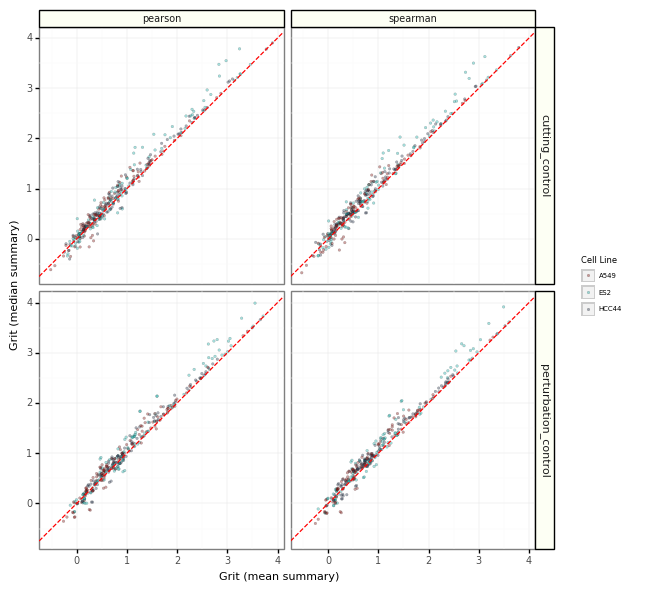

<ggplot: (403457527)>

In [5]:
metric_summary_gg = (
    gg.ggplot(summary_metric_df, gg.aes(x="mean_summary", y="median_summary"))
    + gg.geom_point(gg.aes(fill="cell_line"), alpha=0.4, size=1, stroke=0.1)
    + gg.geom_abline(intercept=0, slope=1, color="red", linetype="dashed")
    + gg.facet_grid("barcode_control~cor_method")
    + gg.scale_fill_manual(name="Cell Line", values=cell_line_colors)
    + gg.coord_fixed()
    + gg.xlab("Grit (mean summary)")
    + gg.ylab("Grit (median summary)")
    + gg.theme_bw()
    + grit_theme
)

metric_summary_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.5 x 3 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/cell_health_grit_metric_summary_comparison.png
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarn

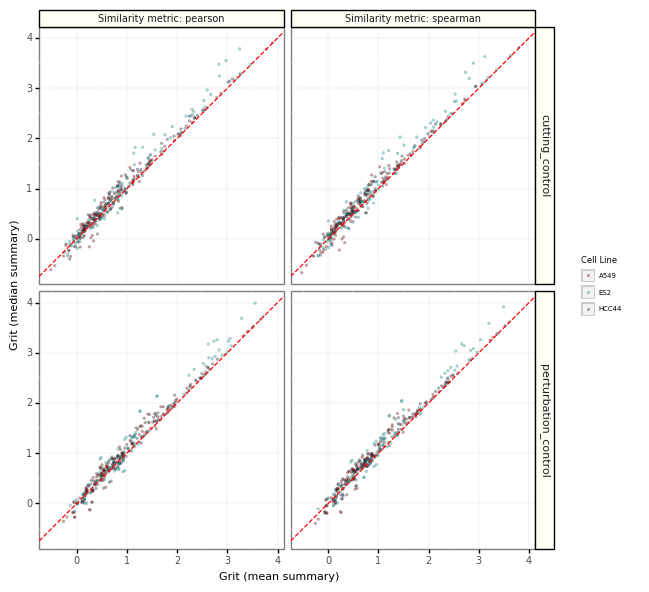

<ggplot: (403876491)>

In [6]:
def col_func(s):
    return f"Similarity metric: {s}"

metric_summary_gg = (
    gg.ggplot(summary_metric_df, gg.aes(x="mean_summary", y="median_summary"))
    + gg.geom_point(gg.aes(fill="cell_line"), alpha=0.4, size=1, stroke=0.1)
    + gg.geom_abline(intercept=0, slope=1, color="red", linetype="dashed")
    + gg.facet_grid("barcode_control~cor_method", labeller=gg.labeller(cols=col_func))
    + gg.scale_fill_manual(name="Cell Line", values=cell_line_colors)
    + gg.coord_fixed()
    + gg.xlab("Grit (mean summary)")
    + gg.ylab("Grit (median summary)")
    + gg.theme_bw()
    + grit_theme
)

output_file = pathlib.Path(f"{output_dir}/cell_health_grit_metric_summary_comparison.png")
metric_summary_gg.save(output_file, dpi=500, height=3, width=6.5)

metric_summary_gg

In [7]:
# What is the Spearman correlation between the four above facets

(
    summary_metric_df
    .groupby(["barcode_control", "cor_method"])
    .corr(method="spearman")
    .reset_index()
    .drop(["median_summary", "grit_replicate_summary_method"], axis="columns")
    .query("mean_summary != 1")
    .rename({
        "mean_summary": "spearman_correlation_between_grit_summary_metrics"
    }, axis="columns")
    .reset_index(drop=True)
)

grit_replicate_summary_method,barcode_control,cor_method,spearman_correlation_between_grit_summary_metrics
0,cutting_control,pearson,0.979818
1,cutting_control,spearman,0.980228
2,perturbation_control,pearson,0.982086
3,perturbation_control,spearman,0.983513
